In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams

In [58]:
df = pd.read_csv("../assets/umk_tweets_202112_clean.csv")
df.head()

,tweet,userid
0,umk sragen ditetapkan rp rp sayang terendah so...,949224511508955136
1,umk kota bekasi ump dki jakarta yak terobosss😭,1259379786566086658
2,umk yo regone mundak maneh bos,1572322873
3,umk kabupatenkota jawa resmi diumumkan kota se...,949224511508955136
4,sumpah umk malang segini iya mending nyari ker...,181023564


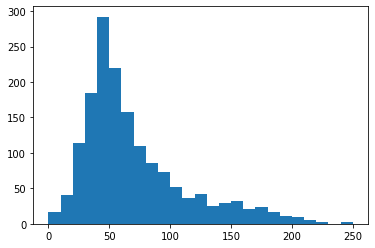

In [59]:
# Sebaran plot histogram jumlah karater per tweet 
bin_range = np.arange(0,260,10)
plt.hist(
    x = df['tweet'].str.len(), 
    bins = bin_range
)
plt.show()

# one line : df['tweet'].str.len().hist(bins=bin_range)

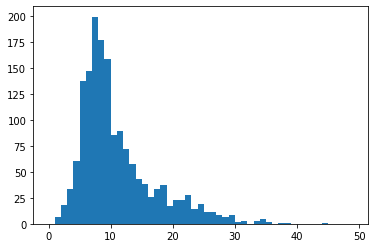

In [60]:
# Sebaran plot histogram jumlah kata per tweet 
bin_range = np.arange(0,50)

plt.hist(
    x = df['tweet'].str.split().map(lambda x : len(x)), 
    bins = bin_range
)
plt.show()

# one line : df['tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)

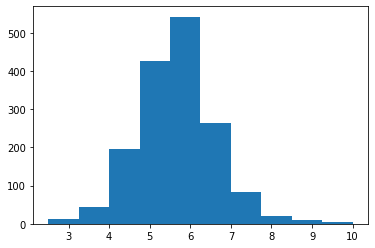

In [61]:
# Panjang Kata Rata-Rata Pada Data
plt.hist(
    x = df['tweet'].str.split().apply(lambda x : [len(i) for i in x]).apply(lambda x : np.mean(x)),
)
plt.show()

# one line : df['tweet'].str.split().apply(lambda x : [len(i) for i in x]).apply(lambda x : np.mean(x)).hist()

In [62]:
# word_tokenize(tweets['tweet'][0])
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df.head()

,tweet,userid
0,"[umk, sragen, ditetapkan, rp, rp, sayang, tere...",949224511508955136
1,"[umk, kota, bekasi, ump, dki, jakarta, yak, te...",1259379786566086658
2,"[umk, yo, regone, mundak, maneh, bos]",1572322873
3,"[umk, kabupatenkota, jawa, resmi, diumumkan, k...",949224511508955136
4,"[sumpah, umk, malang, segini, iya, mending, ny...",181023564


In [66]:
# menggabungkan semua token ke dalam satu list 
tweets = [word for tweet in df['tweet'] for word in tweet]

In [68]:
fqdist = FreqDist(tweets)
mostCommon = fqdist.most_common(20)
mostCommon

[('umk', 1633),
 ('jawa', 589),
 ('tidak', 339),
 ('buruh', 320),
 ('kota', 253),
 ('gubernur', 239),
 ('timur', 237),
 ('barat', 236),
 ('rp', 197),
 ('upah', 173),
 ('kabupaten', 169),
 ('daftar', 156),
 ('kenaikan', 156),
 ('gaji', 146),
 ('besaran', 140),
 ('tertinggi', 124),
 ('daerah', 120),
 ('minimum', 117),
 ('kabupatenkota', 103),
 ('banten', 102)]

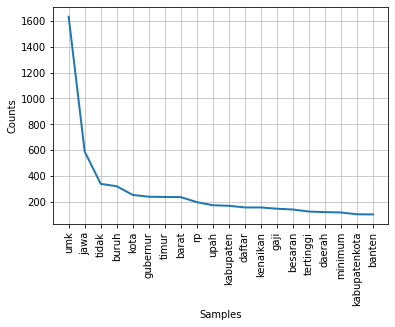

In [70]:
fqdist.plot(20, cumulative=False)
plt.show()

### Distribusi N-Gram

In [76]:
result = pd.Series(ngrams(tweets, 2)).value_counts()[:20]
result

(jawa, timur)               232
(jawa, barat)               227
(umk, jawa)                 169
(upah, minimum)             116
(kenaikan, umk)             102
(besaran, umk)               93
(gubernur, jawa)             77
(daftar, umk)                73
(ridwan, kamil)              64
(umk, kabupaten)             64
(gaji, umk)                  63
(umk, kota)                  56
(rp, ribu)                   55
(penetapan, umk)             54
(daftar, lengkap)            48
(umk, kabupatenkota)         47
(kota, bekasi)               47
(tetapkan, umk)              45
(umk, tidak)                 41
(minimum, kabupatenkota)     41
dtype: int64